# Loading Libraries 

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df=pd.read_csv('skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.shape 

(10000, 18)

In [5]:
df.columns 

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

No null values present in the dataset 

# EDA (Expolatory Data Analysis)

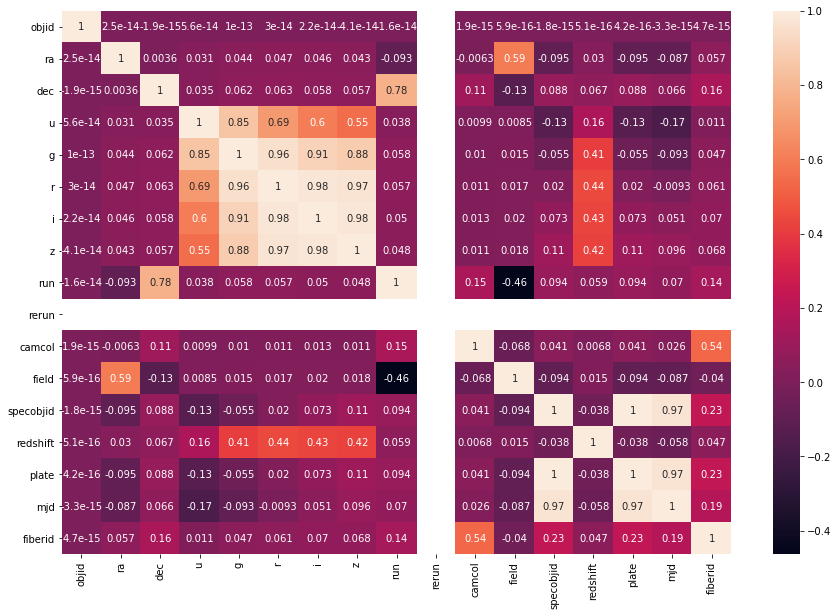

In [8]:
#Checking corelation using heatmap

corr=df.corr()  # df.corr function provides the corelation values of each column 
fig, ax=plt.subplots(figsize=(15,10))
sn.heatmap(corr,annot=True) #using heatmap we are ploting correlation values obtained by df.corr function.......
#annot=True to put the numbers on the blocks of thr graph 
plt.show()

In [9]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


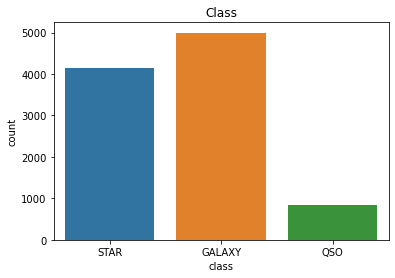

In [11]:
sn.countplot(df['class'])
plt.title("Class")
plt.show()

Galaxy has the hiest number of observations as compare to other two i.e. STAR and QSO

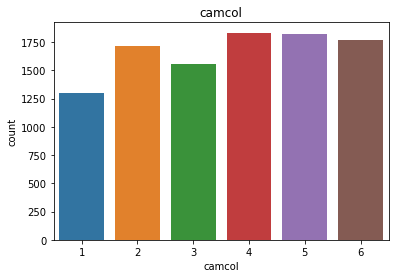

In [12]:
sn.countplot(df['camcol'])
plt.title("camcol")
plt.show()

4 and 5 has the highest frequency among all 

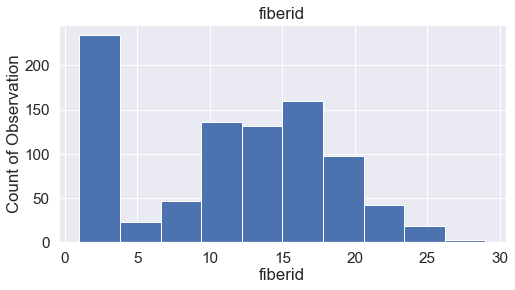

In [24]:
sn.set(font_scale=1.4)
df['fiberid'].value_counts().plot(kind='hist', figsize=(8,4), rot=0)
plt.xlabel("fiberid", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("fiberid", y=1);

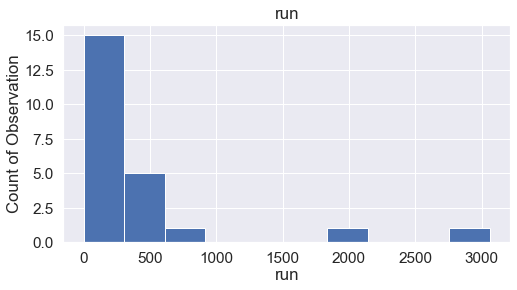

In [28]:
sn.set(font_scale=1.4)
df['run'].value_counts().plot(kind='hist', figsize=(8,4), rot=0)
plt.xlabel("run", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("run", y=1);

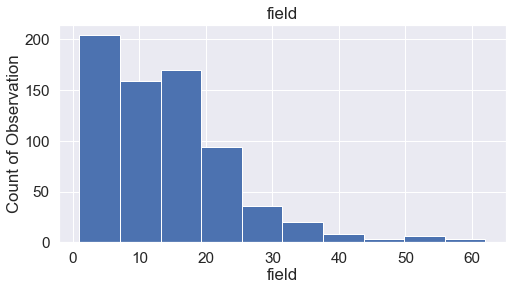

In [29]:
sn.set(font_scale=1.4)
df['field'].value_counts().plot(kind='hist', figsize=(8,4), rot=0)
plt.xlabel("field", labelpad=2)
plt.ylabel("Count of Observation", labelpad=2)
plt.title("field", y=1);

The maximun observation lies between 0-20

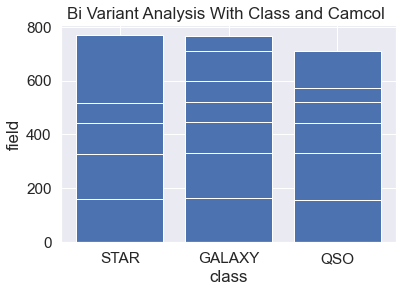

In [31]:
plt.bar(df["class"],df['field'])
plt.title("Bi Variant Analysis With Class and Camcol ")
plt.ylabel('field')
plt.xlabel('class')
plt.show()

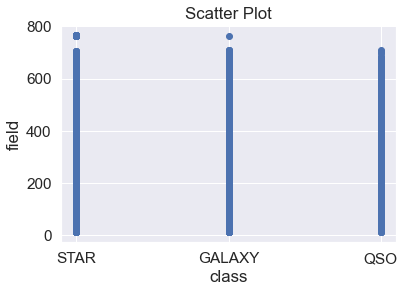

In [32]:
plt.scatter(df["class"],df["field"])
plt.title("Scatter Plot")
plt.xlabel("class")
plt.ylabel("field")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['class']=le.fit_transform(df['class'])
df['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [34]:
x = pd.DataFrame(df, columns = ['ra','dec','u','g','r','i','z','redshift'])

y = pd.DataFrame(df, columns = ['class'])


In [35]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

Train Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=lg()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
pred = model.predict(x_test)
print(pred)

[0 1 2 ... 2 2 0]


In [39]:
print ("Accuracy Score:",round(accuracy_score(y_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y_test,pred))

Accuracy Score: 0.85 

Confusion Matrix: 
 
 [[836   1 159]
 [ 20 167   3]
 [102  21 691]] 

Classification Report: 
 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       996
           1       0.88      0.88      0.88       190
           2       0.81      0.85      0.83       814

    accuracy                           0.85      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.85      0.85      0.85      2000



# Finding Best model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predrfc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predrfc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predrfc))

Accuracy Score: 0.99 	

 Confusion Matrix: 
 
 [[988   3   5]
 [ 11 179   0]
 [  1   0 813]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.98      0.94      0.96       190
           2       0.99      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



RandomForestClassifier is giving the accuracy score of 0.99 i.e. 99% whch is a very good accuracy score and can be considered as the best accuracy for the dataset 

In [42]:
a=np.array(y_test)
a

array([[0],
       [1],
       [0],
       ...,
       [2],
       [2],
       [0]])

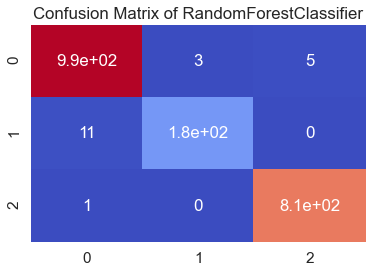

In [44]:
cm = confusion_matrix(y_test,predrfc)
sn.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [46]:
import joblib
joblib.dump(rfc,"sky_Project.pkl")

['sky_Project.pkl']

In [47]:
joblib.load('sky_Project.pkl')

RandomForestClassifier()